# Heart Disease Prediction using ML 

### 1. Problem Definition

> Given the parameters about a patient, can we predict that the patient has heart disease or not?
### 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

>Only 14 attributes used

### 4. Features
Getting information about the attributes in your dataset.
**Create data Dictionary**
* age              

* sex (female=0, male=1)

* cp - chest pain type

* trestbps - resting blood pressure

* chol - cholesterol

* fbs - fasting blood sugar

* restecg - resting electrocardiographic results

* thalach- maximum heart rate achieved

* exang - exercise induced angina (1=yes,0=no)
 
* oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during unhealthy heart will stress more

* slope - the slope of the peak exercise ST segment

* ca - number of major vessels

* thal - thallium stress result

* Target(0: no heart disease, 1: heart disease)
(the predicted attribute)

In [2]:
#Import the libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#models from sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load dataset

In [3]:
heart_disease = pd.read_csv('heart-disease.csv')

In [4]:
heart_disease.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart_disease.shape

(303, 14)

In [6]:
#To check if any null values
heart_disease.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
#describe gives mean, std deviation, variance etc
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Exploratory Data Analysis

In [9]:
#To find out the number of 0 and 1 in target
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

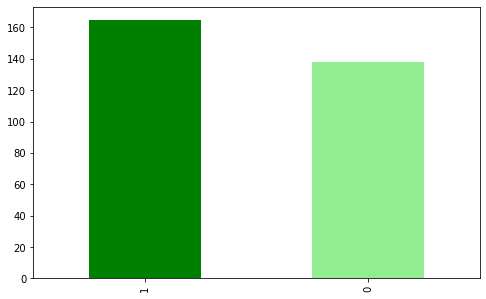

In [10]:
heart_disease['target'].value_counts().plot(kind='bar', color=['green', 'lightgreen'], figsize=(8,5));

In [11]:
#Comparing target with sex
pd.crosstab(heart_disease.target, heart_disease.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

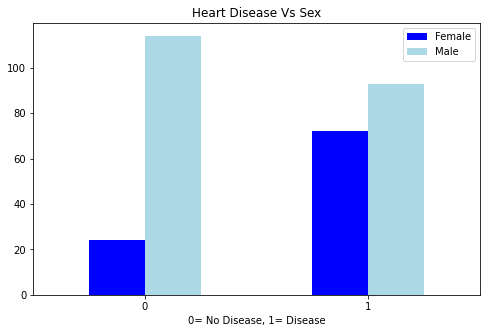

In [12]:
#Comparing target with sex
heart_disease['sex'].value_counts()
pd.crosstab(heart_disease.target, heart_disease.sex).plot(kind='bar', color=['blue', 'lightblue'], figsize=(8,5));
plt.title('Heart Disease Vs Sex')
plt.xlabel('0= No Disease, 1= Disease')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0)

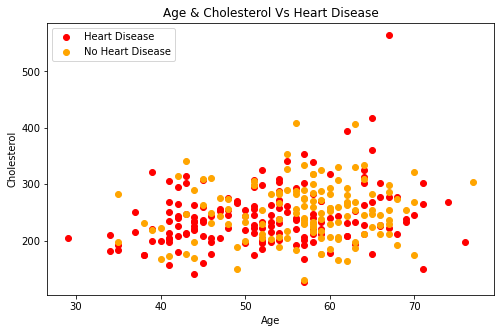

In [13]:
#Comparing age and cholesterol with the target
plt.figure(figsize=(8,5))
plt.title('Age & Cholesterol Vs Heart Disease')

#scatter with positive samples
plt.scatter(heart_disease.age[heart_disease.target==1],
           heart_disease.chol[heart_disease.target==1],
           color='red');
plt.xlabel('Age')
plt.ylabel('Cholesterol')

#scatter with negative samples
plt.scatter(heart_disease.age[heart_disease.target==0],
           heart_disease.chol[heart_disease.target==0],
           color='orange');
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(['Heart Disease', 'No Heart Disease']);

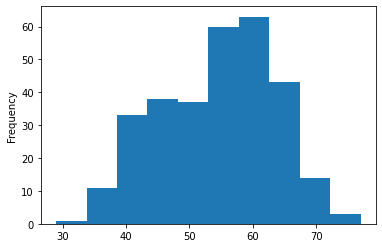

In [14]:
#histogram to check the spread of age and see if any outliers
heart_disease['age'].plot(kind='hist');

### Heart Disease Vs Chest Pain

Chest pain type-
> 0: Typical angina - chest pain related decrease blood supply to the heart

>1: Atypical angina - chest pain not related to heart

> 2: Non-anginal pain - typically esophagus issues (not heart related)

> 3: Asymptomatic - chest pains not showing signs of disease

Text(0, 0.5, 'Chest pain')

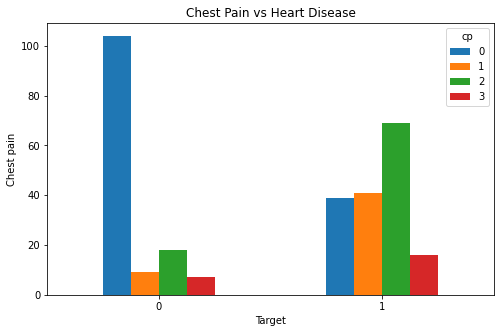

In [15]:
pd.crosstab(heart_disease.target, heart_disease.cp).plot(kind='bar', figsize=(8,5));
plt.xticks(rotation=0);
plt.title('Chest Pain vs Heart Disease')
plt.xlabel('Target')
plt.ylabel('Chest pain')

In [16]:
#correlation matrix
heart_disease.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


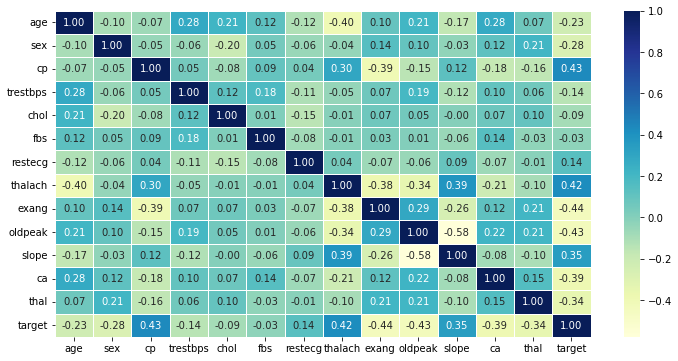

In [17]:
#Correlation matrix heatmap
corr_matrix = heart_disease.corr()
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt="0.2f",
                cmap='YlGnBu')

### Modelling

In [18]:
heart_disease.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [19]:
#Split into X and y
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

In [20]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [21]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [22]:
#Splitting into training and test sets
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2


In [24]:
y_train

74     1
153    1
64     1
296    0
287    0
      ..
251    0
192    0
117    1
47     1
172    0
Name: target, Length: 242, dtype: int64

In [25]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,44,0,2,118,242,0,1,149,0,0.3,1,1,2
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2


In [26]:
y_test

225    0
152    1
228    0
201    0
52     1
      ..
146    1
302    0
26     1
108    1
89     1
Name: target, Length: 61, dtype: int64

Trying 3 different ML models - 
* Logistic Regression
* K-Nearest Neighbors Classifier
* Random Forest Classifier

In [27]:
#Put models in a dictionary
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}
#Create a function to fit and score data models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    #Setup random seed
    np.random.seed(0)
    #Make a dictionary to keep model scores
    model_scores = {}
    #Loop through the models
    for name, model in models.items():
        #Fit the model to the data
        model.fit(X_train, y_train)
        #Evaluate the model and append its scores to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [28]:
model_scores = fit_and_score(models=models,
                            X_train = X_train,
                            X_test = X_test,
                            y_train = y_train,
                            y_test = y_test)
model_scores

C:\Users\admin\Desktop\sampleproj\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.639344262295082,
 'Random Forest': 0.8852459016393442}

## Model Comparison

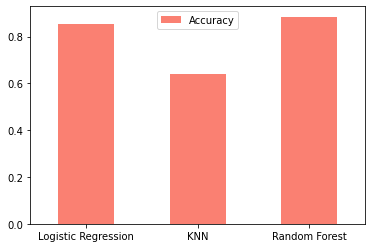

In [29]:
model_compare = pd.DataFrame(model_scores, index=['Accuracy'])
#T -> Transpose
model_compare.T.plot(kind='bar', color='Salmon');
plt.xticks(rotation=0);

We are going to look at the following-
* Hyperparameters tuning
* Feature importance
* Confusion Matrix
* Precision
* Recall
* F1 Score
* Cross-validation
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning

In [30]:
#Lets tune KNN
train_scores = []
test_scores = []

#Create a list of different values for n_neighbors
neighbors = range(1,21)

#Setup KNN instance
knn = KNeighborsClassifier()

#Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #Fit the algorithm
    knn.fit(X_train, y_train)
    
    #Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    #update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [31]:
train_scores

[1.0,
 0.7975206611570248,
 0.78099173553719,
 0.7603305785123967,
 0.78099173553719,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.731404958677686,
 0.7272727272727273,
 0.6900826446280992,
 0.71900826446281,
 0.6859504132231405,
 0.6983471074380165,
 0.6776859504132231,
 0.6942148760330579,
 0.6983471074380165,
 0.6859504132231405,
 0.6818181818181818,
 0.6818181818181818]

In [32]:
test_scores

[0.5245901639344263,
 0.6065573770491803,
 0.639344262295082,
 0.639344262295082,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.6721311475409836,
 0.6557377049180327,
 0.7049180327868853,
 0.6721311475409836,
 0.7213114754098361,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.7213114754098361,
 0.6885245901639344,
 0.7049180327868853,
 0.6885245901639344]

Maximum KNN score on the test data: 72.13%


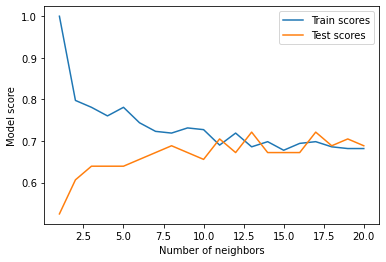

In [33]:
#Visualize
plt.plot(neighbors, train_scores, label='Train scores')
plt.plot(neighbors, test_scores, label='Test scores')
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")


##### Hyperparameter tuning with RandomizedSearchCV
We are going to tune
* LogisticRegression()
* RandomForestClassifier()

using RandomizedSearchCV


In [34]:
#Create a hyperparamter grid for logistic regression
log_reg_grid = {'C': np.logspace(-4, 4, 20),
               'solver': ['liblinear']} #ie between -4 to 4 and 20 numbers in total

#Create a hyperparameter grid for random forest classifier
rfc_grid = {'n_estimators': np.arange(10, 1000, 50), #n_estimators -> no of trees in our forest
            'max_depth': [None, 3, 5, 10],
            'min_samples_split': np.arange(2,20,2),
            'min_samples_leaf': np.arange(1,20,2)} 

In [ ]:
#np.logspace(-4,4,20)

In [35]:
#Tune LogisticRegression
np.random.seed(0)

#Setup random hyperparameter search for logisticregression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv = 5,
                               n_iter = 20, verbose=True)

#Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [36]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [37]:
rs_log_reg.score(X_test, y_test)

0.8524590163934426

Now we have tuned LogisticRegression() now lets tune RandomForestClassifier()

In [38]:
#Setup random seed
np.random.seed(0)

#Setup random hyperparameter for RandomForestClassifier
rs_rfc = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rfc_grid,
                           cv = 5, n_iter = 25, verbose=True)

#Fit
rs_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=25,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [39]:
rs_rfc.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 17,
 'max_depth': 3}

In [40]:
rs_rfc.score(X_test, y_test)

0.8524590163934426

##### Hyperparamater Tuning with GridSearchCV

In [41]:
#Different hyperparameters for our LogisticRegression model
log_reg_grid = {'C': np.logspace(-4, 4, 30),
                'solver': ['liblinear']}

#Setup Grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_reg_grid,
                         cv=5, verbose=True)

#Fit
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [42]:
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [43]:
gs_log_reg.score(X_test, y_test)

0.8524590163934426

Logistic Regression gave the same value that is 85.2 with both RandomizedSearchCV and GridSearchCV

#### Evaluating our model

In [44]:
#Making predictions with the tuned model
y_preds = gs_log_reg.predict(X_test)

In [45]:
y_preds

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [46]:
y_test

225    0
152    1
228    0
201    0
52     1
      ..
146    1
302    0
26     1
108    1
89     1
Name: target, Length: 61, dtype: int64

#### ROC Curve
ROC Curve compares the true positive rate and the false positive rat


C:\Users\admin\Desktop\sampleproj\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


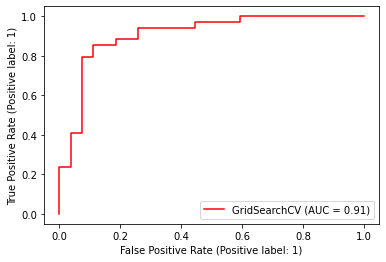

In [49]:
#Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test, color='red');

The area under the curve comes out to be 0.91

C:\Users\admin\Desktop\sampleproj\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


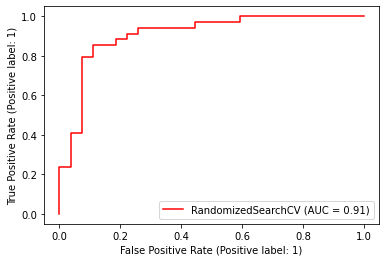

In [50]:
plot_roc_curve(rs_log_reg, X_test, y_test, color='red');

##### Confusion Matrix

In [51]:
print(confusion_matrix(y_test, y_preds))

[[22  5]
 [ 4 30]]


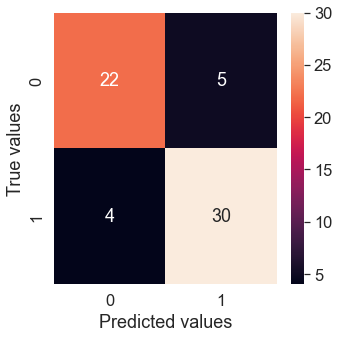

In [73]:
#Visualize the confusion matrix
sns.set(font_scale=1.5)

def conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(5,5))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    
conf_mat(y_test, y_preds)

##### Classification Report

In [55]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



##### Calculate evaluation metrics using cross validation using `cross_val_score`

In [56]:
#Check best hyperparameters
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [58]:
#Create a new classifier
clf = LogisticRegression(C=1.3738237958832638, solver='liblinear')

In [59]:
#cross validated accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
cv_acc

array([0.81967213, 0.86885246, 0.85245902, 0.85      , 0.71666667])

In [60]:
np.mean(cv_acc)

0.8215300546448088

In [61]:
#Cross validated precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring='precision')
cv_precision

array([0.78947368, 0.90322581, 0.85294118, 0.83333333, 0.71052632])

In [62]:
np.mean(cv_precision)

0.817900063251107

In [63]:
#Cross validated recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring='recall')
cv_recall

array([0.90909091, 0.84848485, 0.87878788, 0.90909091, 0.81818182])

In [64]:
np.mean(cv_recall)

0.8727272727272727

In [65]:
#cross validated f1 score
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring='f1')
cv_f1

array([0.84507042, 0.875     , 0.86567164, 0.86956522, 0.76056338])

In [66]:
np.mean(cv_f1)

0.8431741323998502

# Feature importance
It tells us which of the features contributed the most to the outcomes of the model.

In [75]:
#Fit an instance of LogisticRegression
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [76]:
clf = LogisticRegression(C=1.3738237958832638, solver='liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=1.3738237958832638, solver='liblinear')

In [77]:
#Check coef_ 
#this gives a coefficient and tells how each attribute conributes to our target
clf.coef_

array([[ 0.00671248, -1.58502785,  0.75396434, -0.00843203, -0.00396127,
        -0.3353385 ,  0.2293114 ,  0.02938386, -0.86471122, -0.53969171,
         0.21084964, -0.86551137, -0.68739776]])

In [78]:
#Match coef's of features to columns
feature_dict = dict(zip(heart_disease.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.006712475039759865,
 'sex': -1.5850278470915744,
 'cp': 0.7539643441966645,
 'trestbps': -0.00843203422409945,
 'chol': -0.003961268150037997,
 'fbs': -0.3353384986827546,
 'restecg': 0.2293113984549855,
 'thalach': 0.029383855204145642,
 'exang': -0.8647112224306185,
 'oldpeak': -0.5396917078187907,
 'slope': 0.21084964098970807,
 'ca': -0.8655113725626706,
 'thal': -0.6873977619016627}

<AxesSubplot:title={'center':'Feature Importance'}>

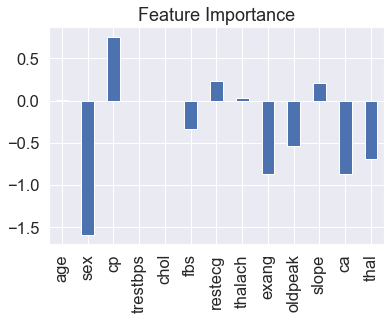

In [79]:
#Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False)

#### Trying Bernoulli's Naive Bayes

In [80]:
from sklearn.naive_bayes import BernoulliNB

#generate random seed
np.random.seed(0)

#X and y
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

#training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#create model
clf = BernoulliNB()
clf.fit(X_train, y_train)

#score
clf.score(X_test, y_test)

0.819672131147541

#### Trying LinearSVC

In [81]:
#import
from sklearn.svm import LinearSVC

#Setup random seed
np.random.seed(0)

#create X and y
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

#Training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#create model
clf = LinearSVC()
clf.fit(X_train, y_train)

#testing data
clf.score(X_test, y_test)

C:\Users\admin\Desktop\sampleproj\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.7868852459016393

RandomForestClassifier gives the best accuracy until now ie 88.5%